# Семинар: визуализация данных, EDA

## Вступление

На семинаре мы будем заниматься построением различных визуализаций. Наша цель — провести **разведочный анализ данных (exploratory data analysis, EDA)**, чтобы исследовать поведение данных и выявить в них закономерности. Мы продолжим работать с данными о пассажирах Титаника.

### Цели:
* познакомиться с библиотеками matplotlib, seaborn и визуализациями в pandas
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

### Как нужно строить графики:
1. Если график стандартный, используйте matplotlib напрямую из pandas
2. Если график нестандартный, используйте matplotlib
3. Если график совсем нестандартный, то разделите его на несколько стандартных и используйте matplotlib
4. Если нужны профильные красивые графики, график гистограммы с распределением, японские свечи, график pairplot или heatmap, то используйте seaborn (это всё тоже можно сделать в matplotlib, но будет дольше)
5. Если у вас есть два часа времени, чтобы построить один график нормального качества, то используйте plotly
6. Если вам нужно, чтобы получился один красивый график, за который вам очень хорошо заплатят, то используйте plotly

### План:
1. Учимся строить графики
2. Обрабатываем признаки
3. Однофакторный анализ

In [ ]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#визуализация статистических данных

warnings.filterwarnings("ignore")
plt.style.use("seaborn")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Учимся строить графики

Сперва загрузим данные и ещё раз изучим базовую информацию при помощи pandas.

In [ ]:
df = pd.read_csv(
   "https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
   sep=";",
)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Graham; Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Behr; Mr. Karl Howell,male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
891 - 687

204

In [ ]:
df.dropna(axis=0, inplace=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,McCarthy; Mr. Timothy J,male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,Sandstrom; Miss. Marguerite Rut,female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,Bonnell; Miss. Elizabeth,female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,Beckwith; Mrs. Richard Leonard (Sallie Monypeny),female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,Carlsson; Mr. Frans Olof,male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,Potter; Mrs. Thomas Jr (Lily Alexenia Wilson),female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,Graham; Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
# df = pd.read_csv("titanic_train.csv", sep=",")

FileNotFoundError: ignored

In [ ]:
print(f"Data size: {df.shape}")
df.head(10)

Data size: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Каждая строчка набора данных содержит следующие поля:

- Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);

- Name — имя;

- Sex — пол;

- Age — возраст;

- SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту Титаника;

- Parch — количество родителей, детей (в том числе приемных) на борту Титаника;

- Ticket — номер билета;

- Fare — плата за проезд;

- Cabin — каюта;

- Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон)

- Survived - пассажир выжил (1) или нет (0).

В поле Age приводится количество полных лет. Для детей меньше 1 года — дробное. Если возраст не известен точно, то указано примерное значение в формате xx.5.

### Описание признаков

In [ ]:
df.describe() #числовые признаки

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include = 'object') #категориальные признаки

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
#доля пропущенных значений в каждй колонке
df.isna().mean()  # df.isnull() — то же самое, что df.isna()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

### Гистограмма

Начинаем работу с графиками matplotlib и pandas (вызывает те же функции matplotlib).

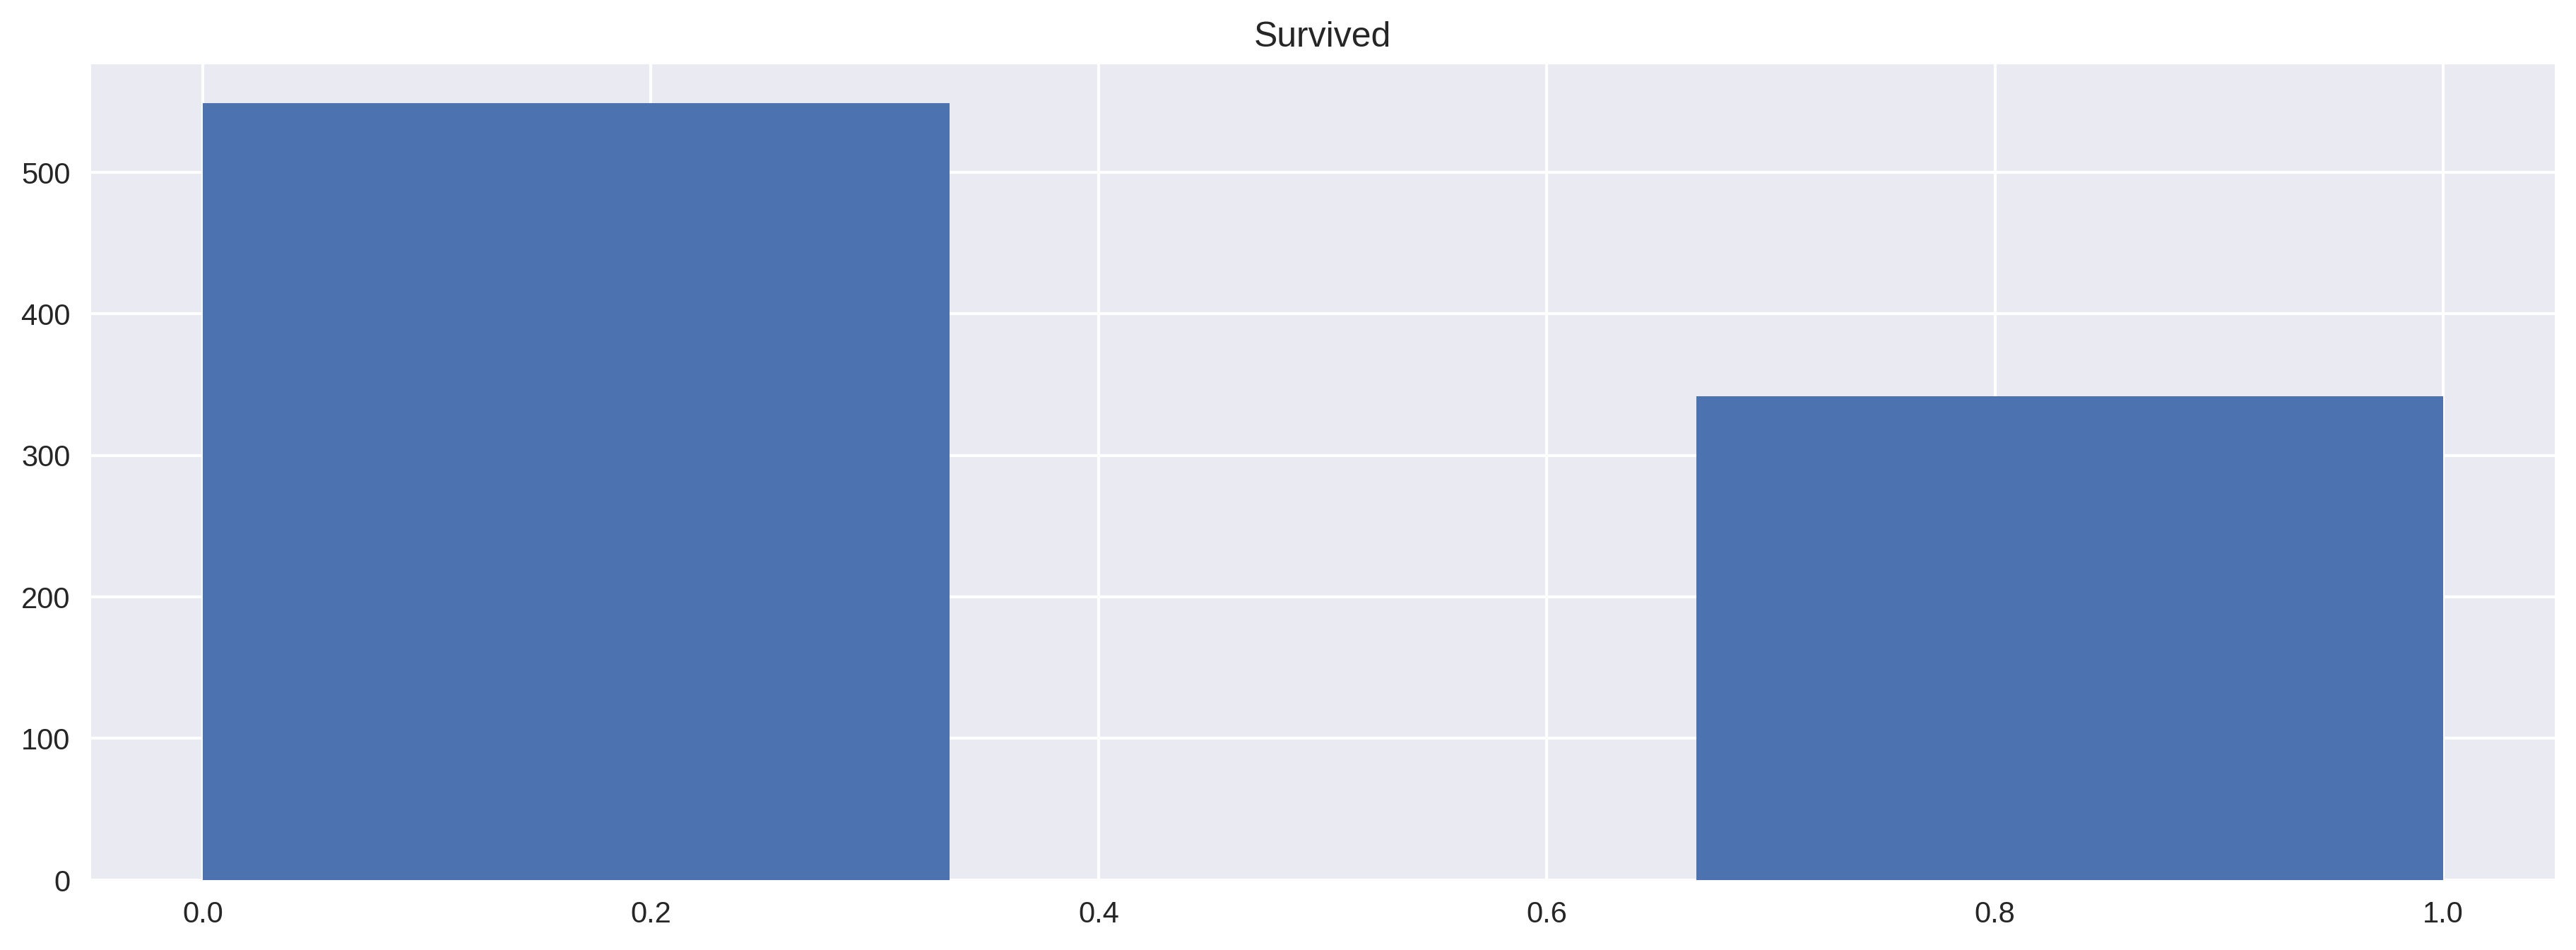

In [ ]:
#вар 1 (гистограмма по целевой переменной: выжил или нет)
plt.figure(figsize=(15, 5), dpi=300)
plt.title("Survived")
df["Survived"].hist(bins=3); #с помощью pandas (bins - число столбиков)


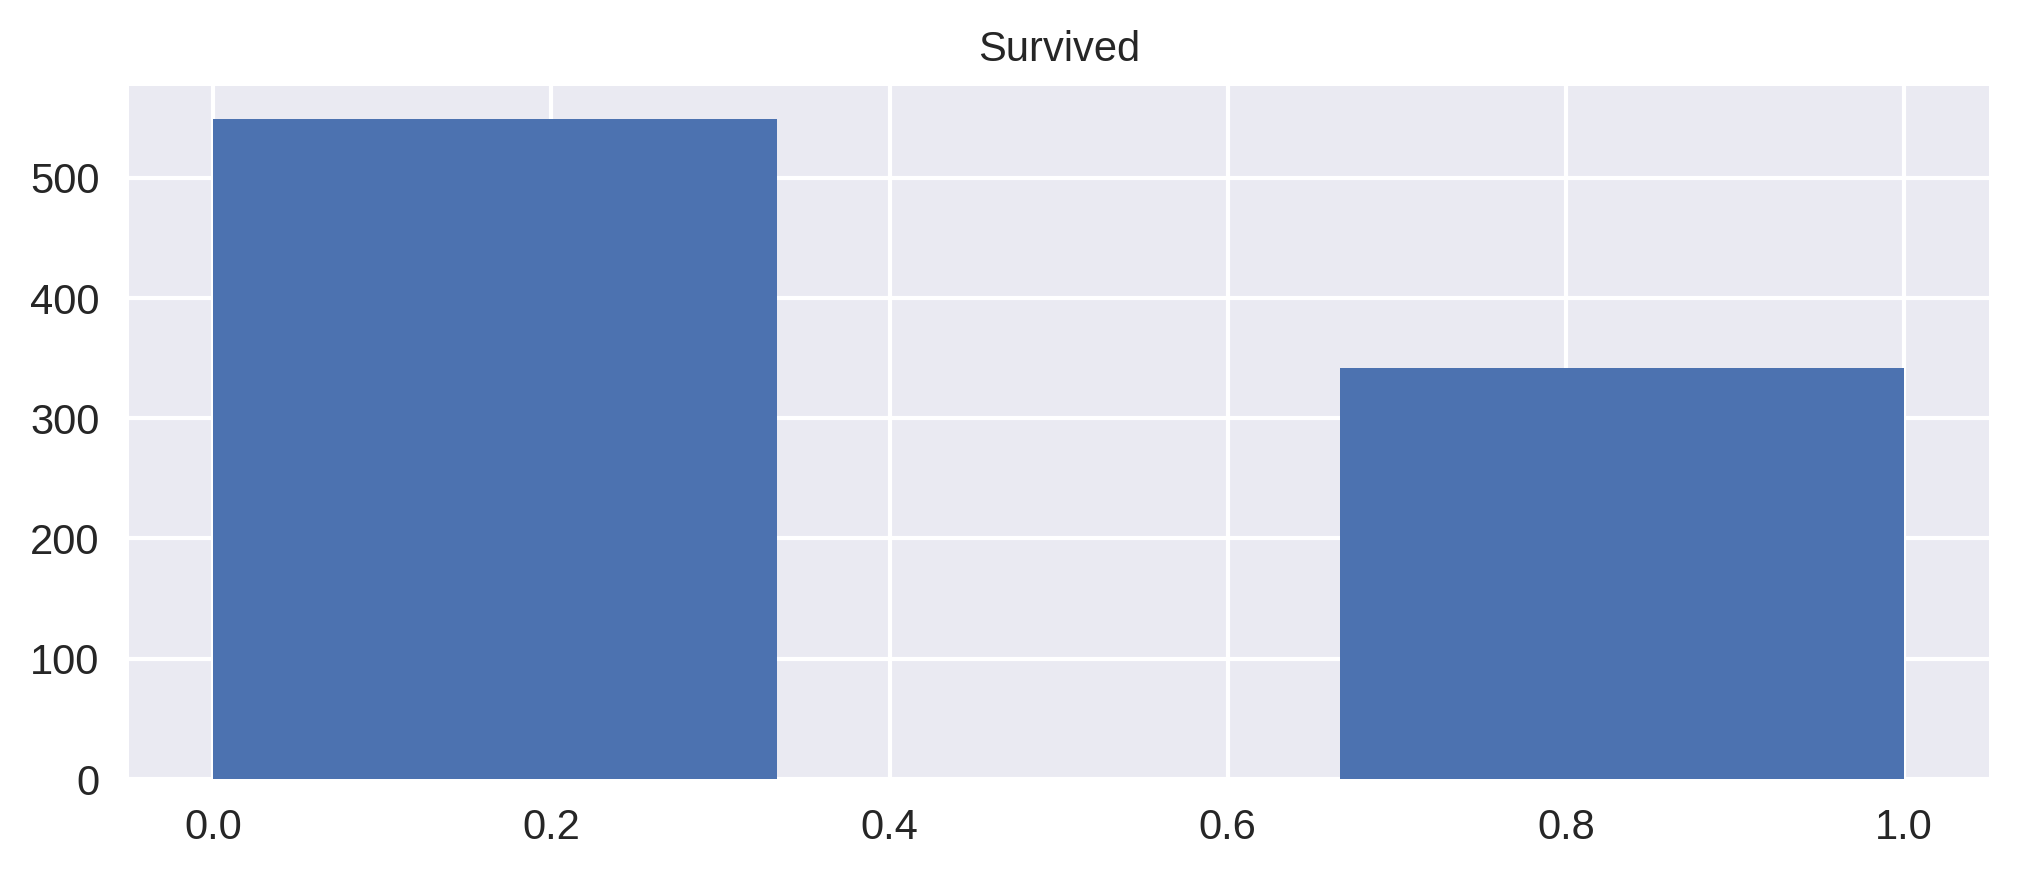

In [ ]:
#вар 2 (гистограмма по целевой переменной: выжил или нет)
plt.figure(figsize=(8, 3), dpi=300)
plt.title("Survived", fontsize=10)
plt.hist(df["Survived"], bins=3); # То же самое, но только с matplotlib


Построим гистаграмму по возрасту. Обратите внимание, что размер фигуры (и многие другие параметры, например, размер шрифтов) можно задавать один раз на весь нутбук при помощи `plt.rc.Params`.

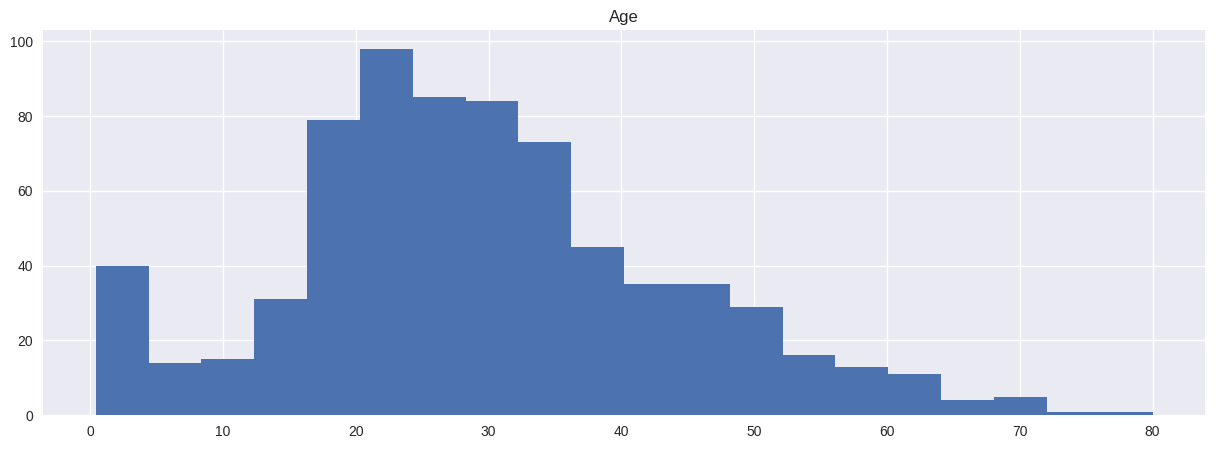

In [ ]:
#Гистограмма по возрасту
# plt.figure(figsize=(15, 5), dpi=300)
plt.rcParams["figure.figsize"] = (15, 5)
plt.title("Age")
df["Age"].hist(bins=20); #с помощью pandas

Для лёгкого разделения по группам выживших и не выживших, используем `seaborn`.

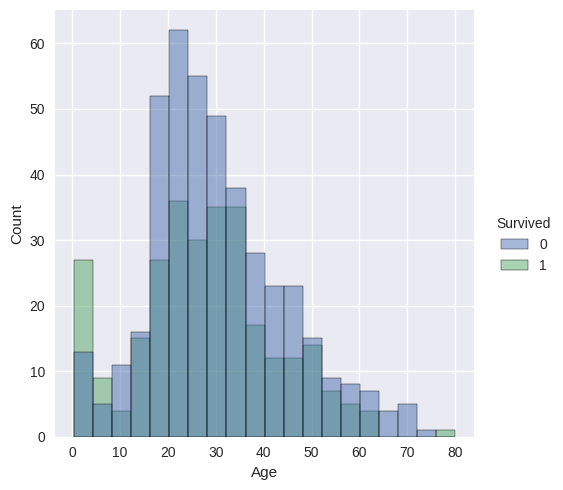

In [ ]:
#вариант 1 (через seaborn)
sns.displot(df, x="Age", hue="Survived") #по умолчанию - гистограмма (по возрасту, раскраска - по выживаемости)
plt.show()

In [ ]:
sns.displot?

В `matplotlib` будет дольше и менее красиво:

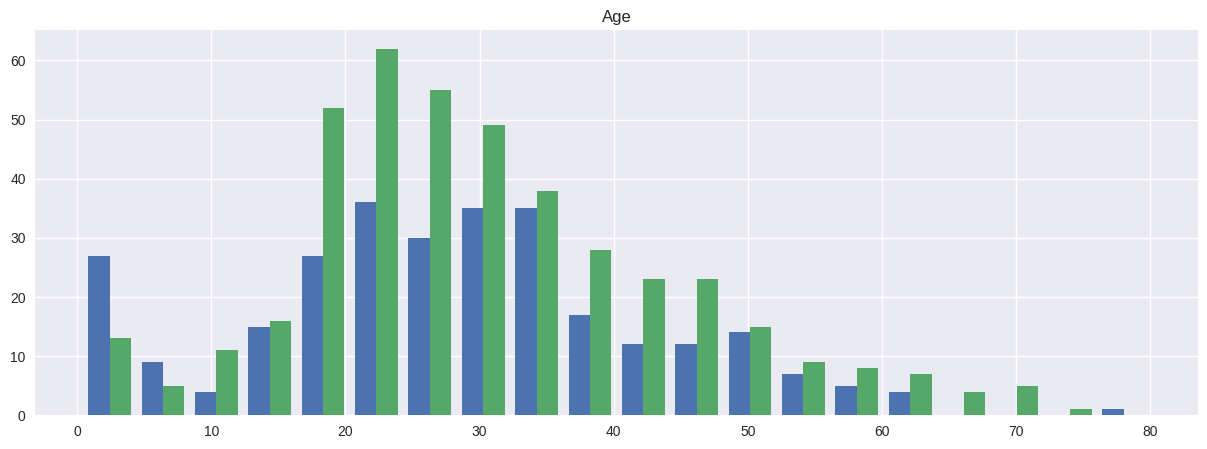

In [ ]:
#вариант 2 (через matplotlib)
#plt.figure(figsize=(15,5))
plt.title("Age")
plt.hist(
    [df["Age"][df["Survived"] == 1], df["Age"][df["Survived"] == 0]],
    stacked=False,
    bins=20,
);

### Корреляция

Давайте оценим корреляцию между столбцами числовых признаков.

In [ ]:
#Вариант 1 (Матрица корреляции)
df.corr() #мера линейной зависимости

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Сделаем её чуть более читаемой.

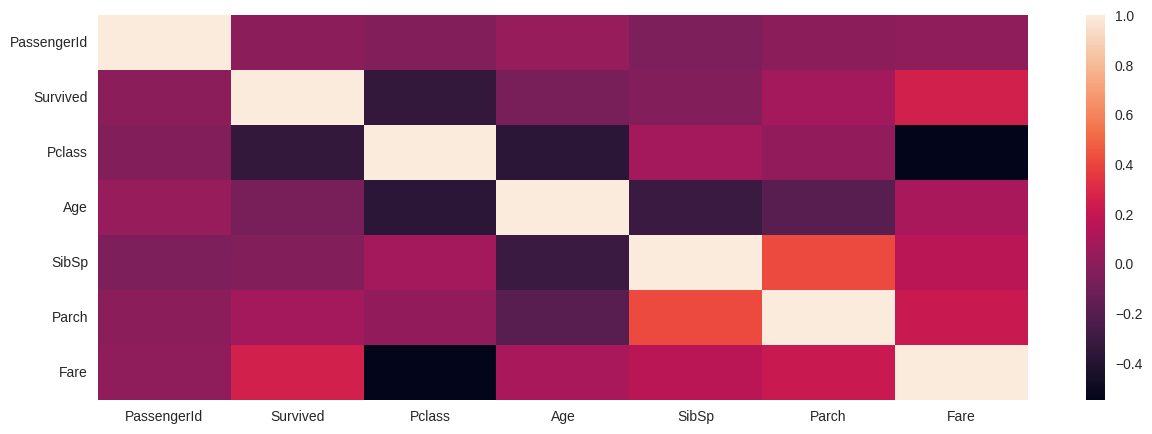

In [ ]:
#Вариант 2 (Матрица корреляции визуально)
sns.heatmap(df.corr());

И ещё более читаемой!

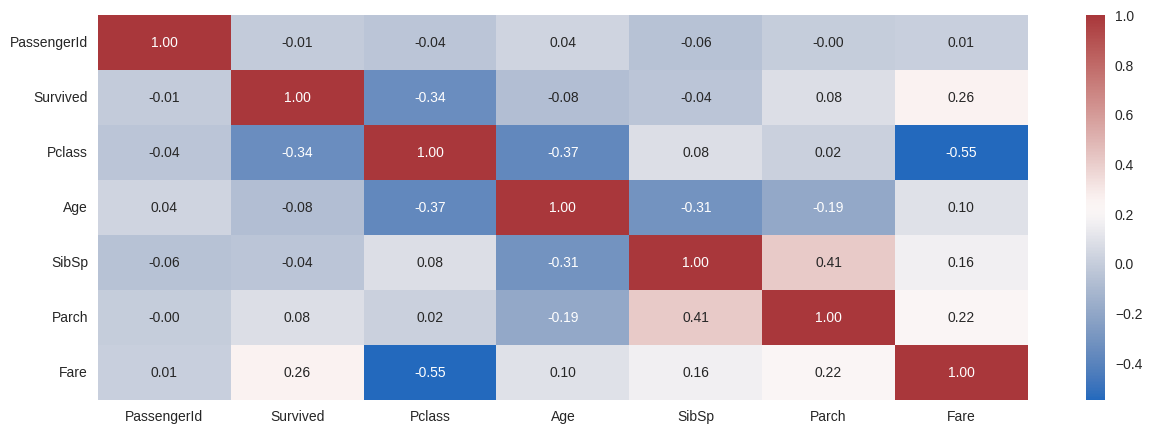

In [ ]:
#Вариант 3 (Матрица корреляции визуально) (cmap - цвет, annot - подписи на ячейках, fmt - число знаков после ,)
sns.heatmap(df.corr(), cmap="vlag", annot=True, fmt="0.2f");

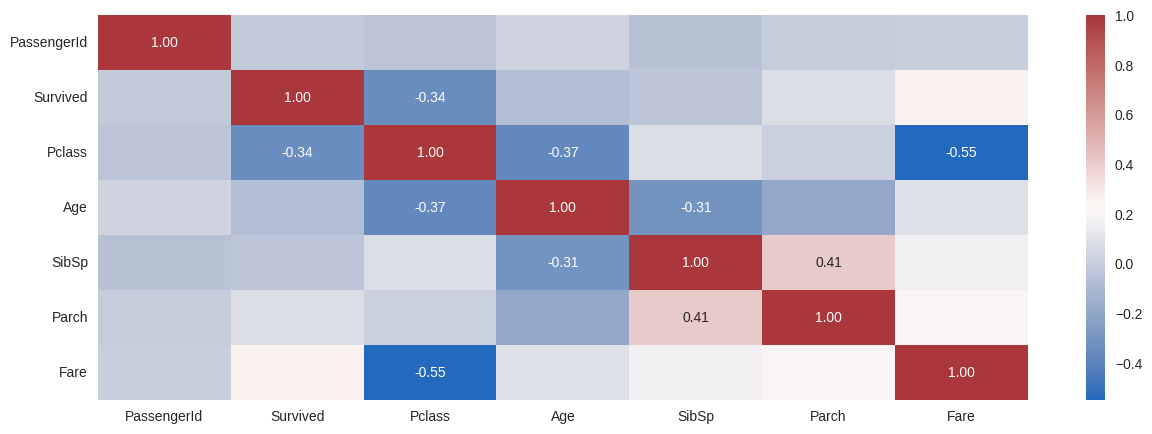

In [ ]:
#Вариант 4 (Матрица корреляции визуально) (отображаем corr, если по модулю больше 0.3)
ax = sns.heatmap(df.corr(), cmap="vlag", annot=True, fmt="0.2f")
for t in ax.texts:
    if float(t.get_text()) >= 0.3 or float(t.get_text()) <= -0.3:
        t.set_text(t.get_text())
    else:
        t.set_text("")

### Группировки

Построим распредление количества билетов разных классов при помощи **bar plot** (горизонтальный).

In [ ]:
df.groupby("Pclass")["Name"].nunique() #число уникальных значений

Pclass
1    216
2    184
3    491
Name: Name, dtype: int64

In [ ]:
df.groupby("Pclass")["Name"].nunique().sort_values() #сортируем

Pclass
2    184
1    216
3    491
Name: Name, dtype: int64

In [ ]:
df.plot?

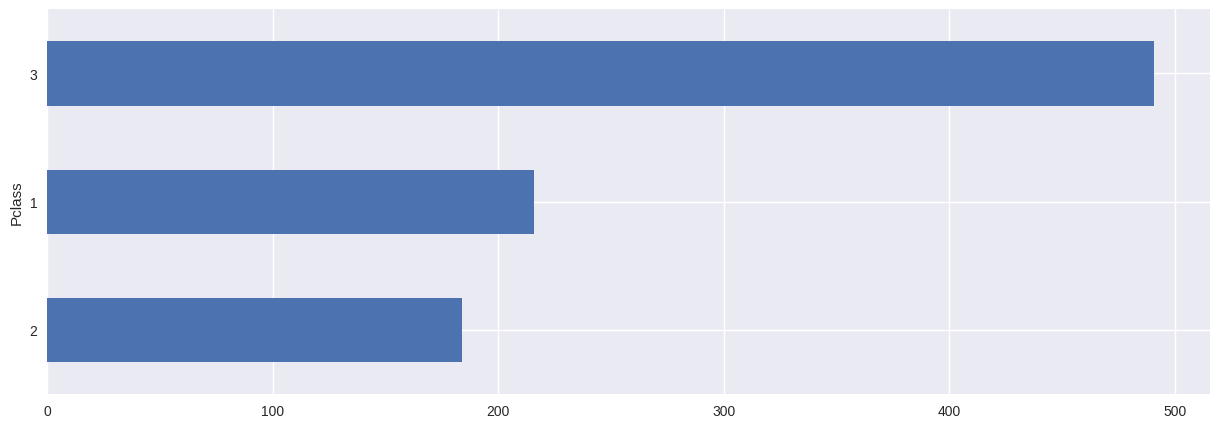

In [ ]:
df.groupby("Pclass")["Name"].nunique().sort_values().plot(kind="barh"); #с помощью pandas (горизонтальный)

### Диаграмма рассеяния (scatter plot)

Посмотрим на взаимосвязь разных переменных при помощи scatter plot (диаграмма рассеяния).

Как scatter строить НЕ нужно:

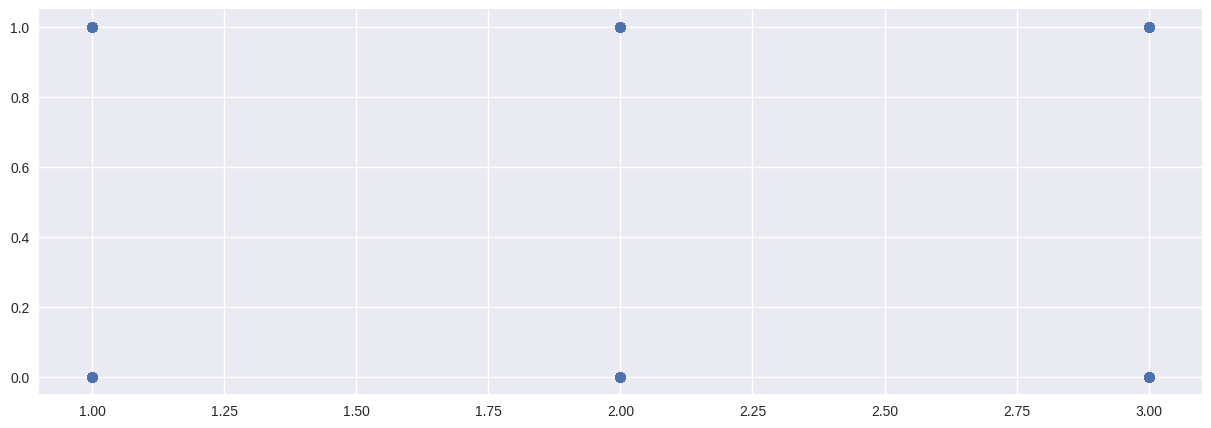

In [ ]:
plt.scatter(df["Pclass"], df["Survived"]); #Мало смысла (Как scatter строить НЕ нужно)

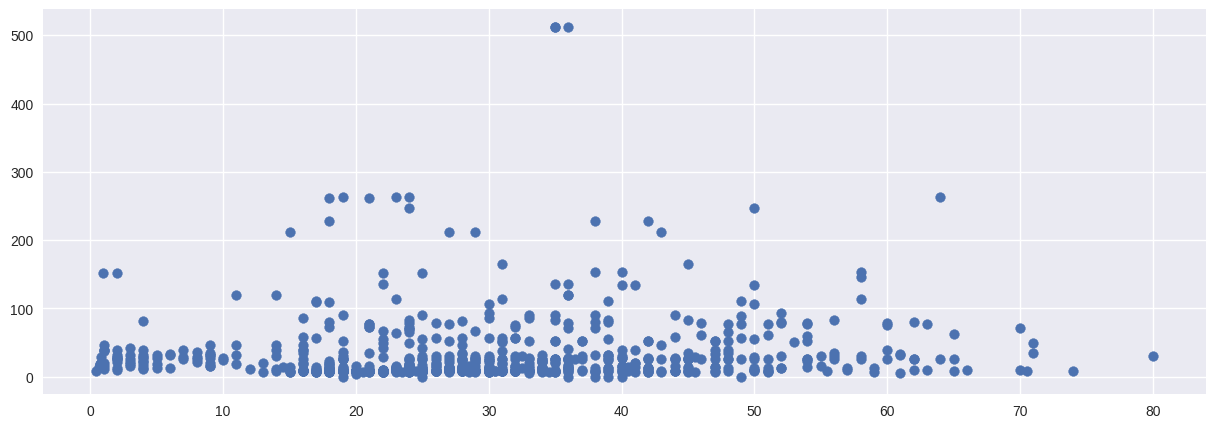

In [ ]:
plt.scatter(df["Age"], df["Fare"]); #Имеет смысл

### Дополнительные возможности с графиками

Ещё на график можно что-то дорисовать. Например, **дополнительные оси**. Можно задать **цвет**.

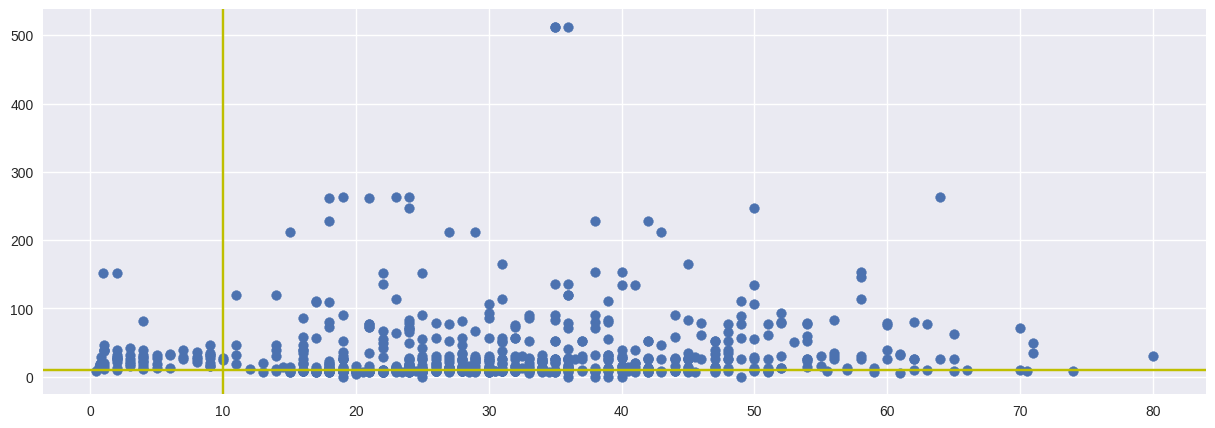

In [ ]:
plt.scatter(df["Age"], df["Fare"]) #, c=df['Survived']) #(точки можно окрасить в цвет признака c=df['Survived'])
plt.axhline(10, c="y") #оси, цвет = yellow
plt.axvline(10, c="y");


Рисуем **несколько графиков**.

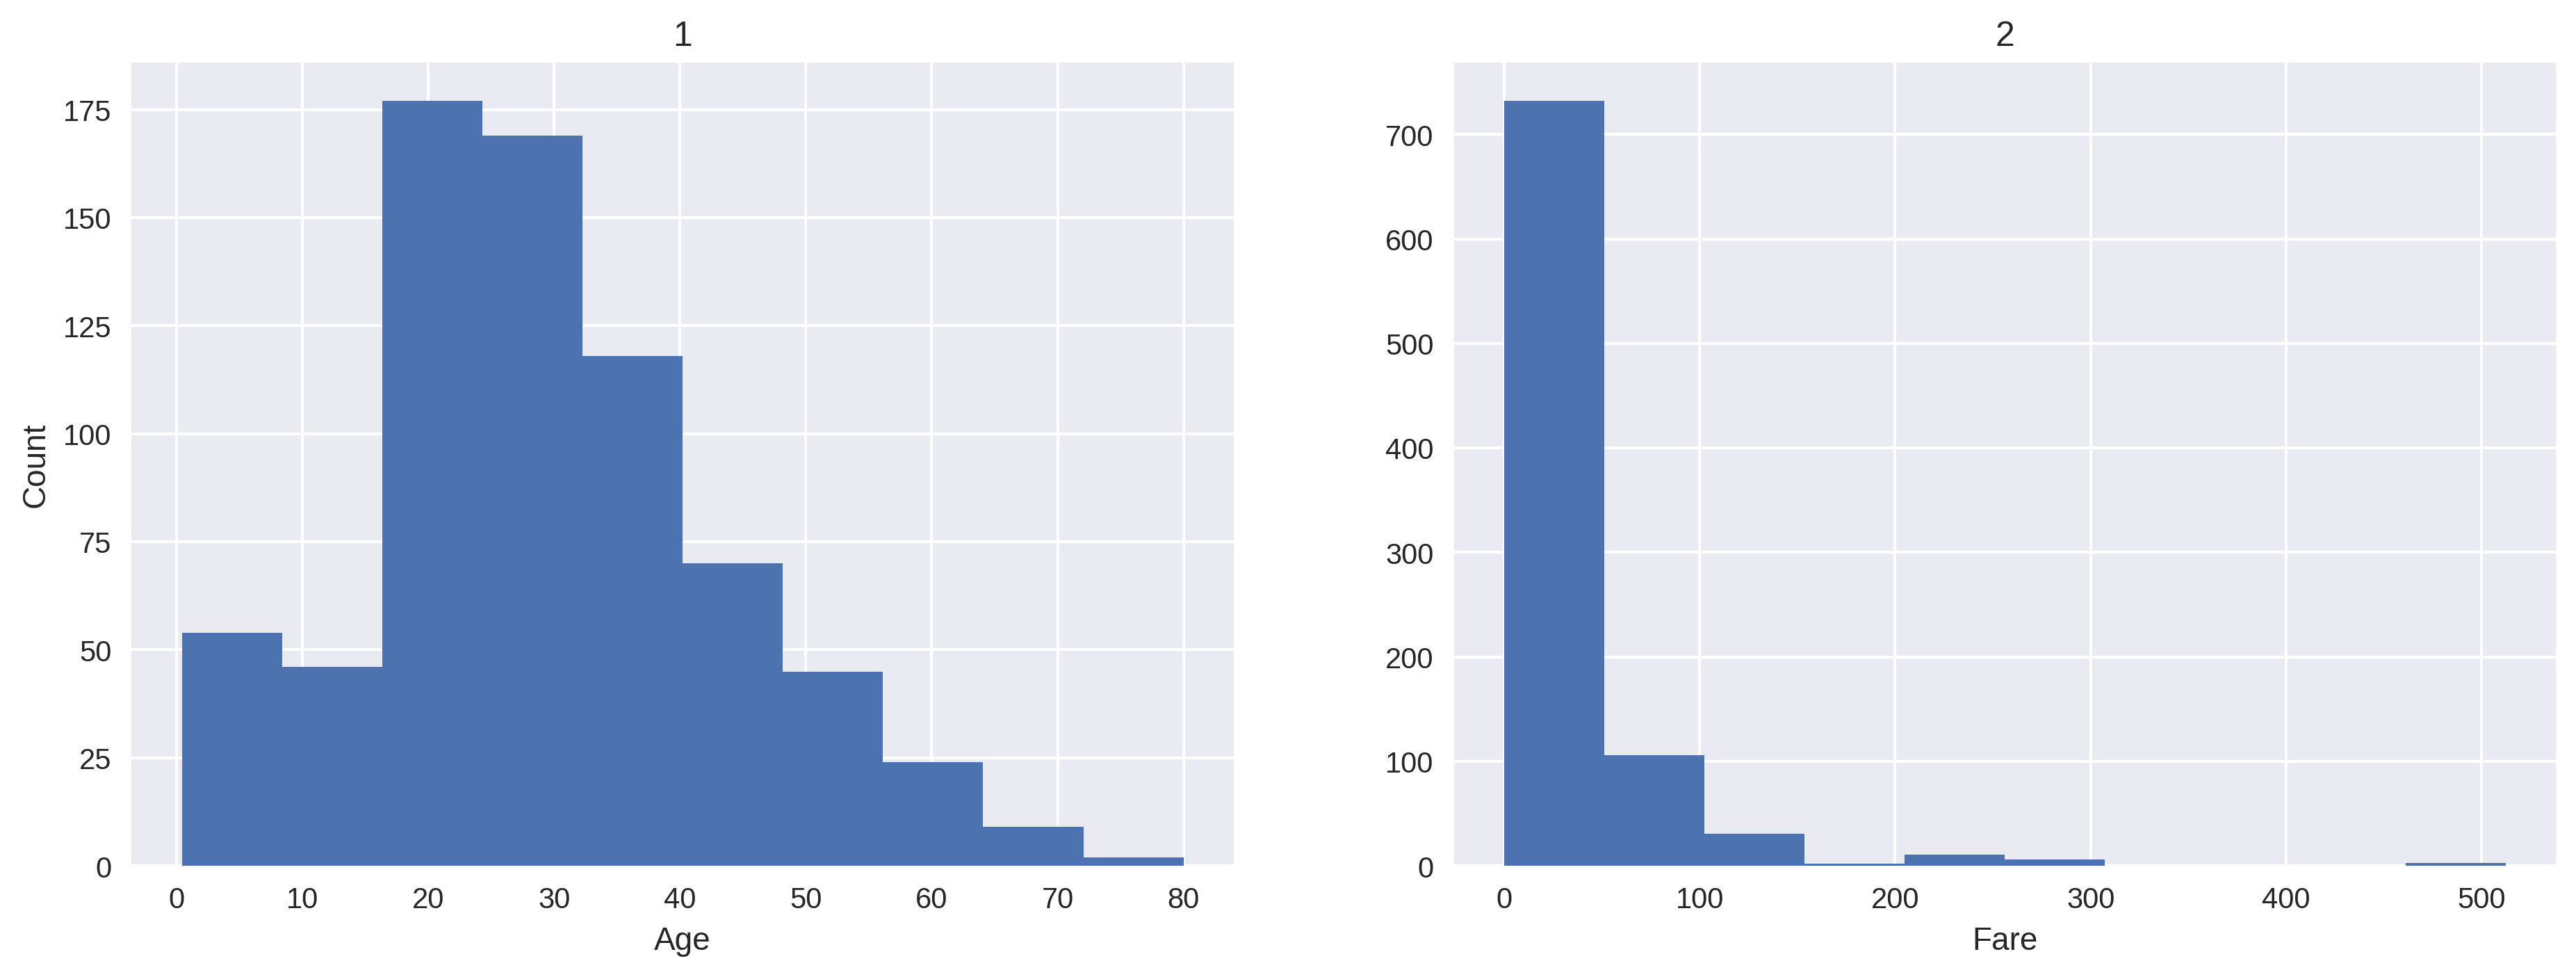

In [ ]:
#Вариант 1
plt.figure(figsize=(15, 5), dpi=300)

plt.subplot(1, 2, 1) #plt.subplot(n_rows, n_cols, index)
plt.title("1")
plt.hist(df["Age"])
plt.ylabel("Count")
plt.xlabel("Age")

plt.subplot(1, 2, 2)
plt.title("2")
plt.hist(df["Fare"])
plt.xlabel("Fare")

plt.show()

Другой способ взаимодействия с подграфиками. Этот способ позволит, например, удобно итерироваться в цикле по графикам и отрисовывать что-то.

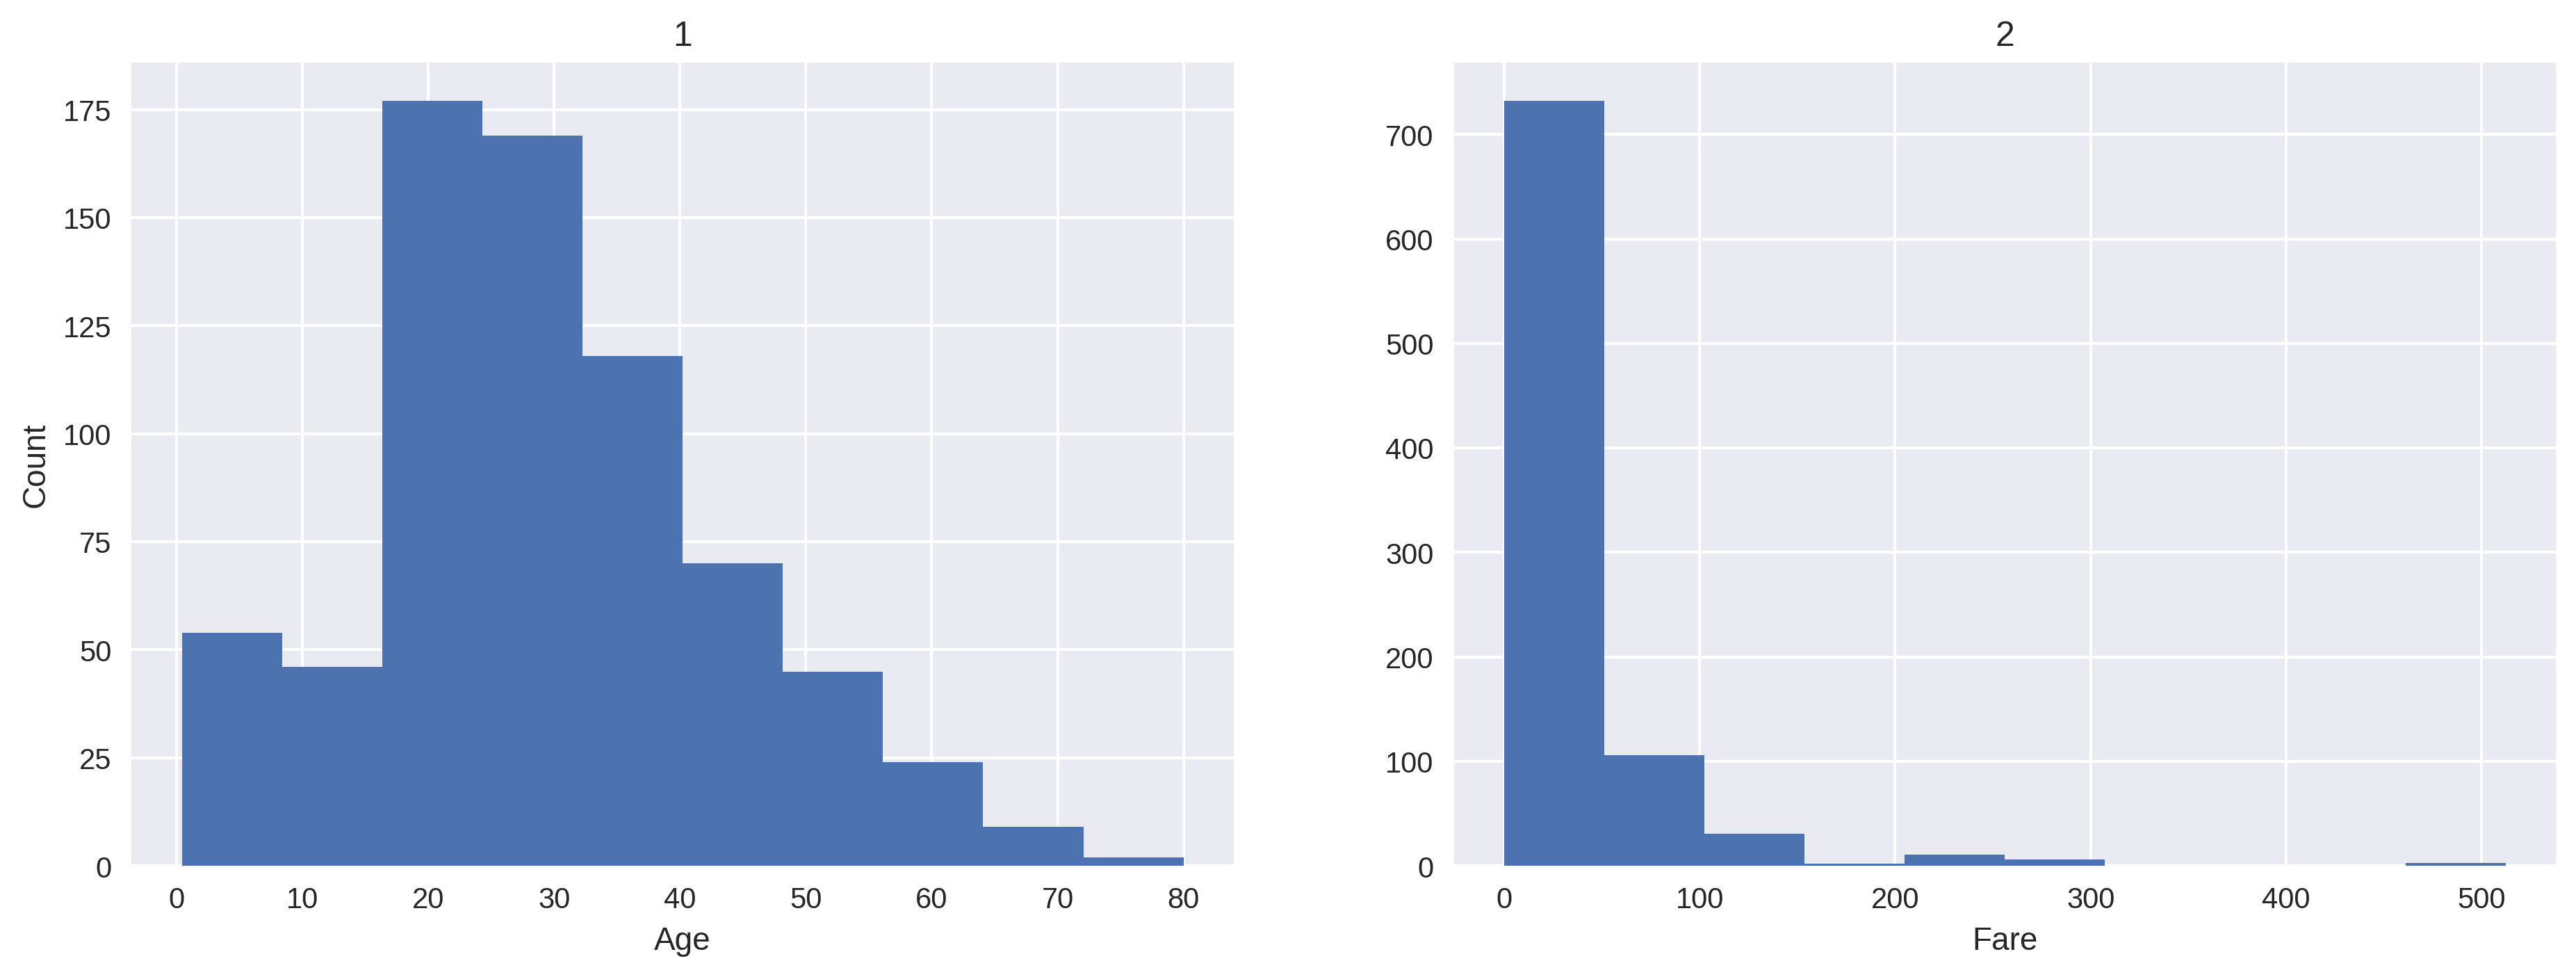

In [ ]:
#Вариант 2
fig, axs = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

axs[0].set_title("1")
axs[0].hist(df["Age"])
axs[0].set_ylabel("Count")
axs[0].set_xlabel("Age")

axs[1].set_title("2")
axs[1].hist(df["Fare"])
axs[1].set_xlabel("Fare")

plt.show()

## Обрабатываем признаки

1. Найдем признаки, у которых есть пропущенные значения, и обработаем эти пропущенные значения
2. Переведём категориальные признаки в числовые



**Задание 1. Выведите (описание) основных числовых характеристик числовых столбцов.**

In [ ]:
# <YOUR CODE HERE>
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### <u> Обработаем признак `Sex`</u>


**Задание 2. Проверьте, есть ли пропуски в столбце `Sex`.**

In [ ]:
# <YOUR CODE HERE>
sum(df.Sex.isna()) # пропусков нет

0

In [ ]:
print(df['Sex'].unique()) #уникальные значения

['male' 'female']


---

**Задание 3 . Подумайте, можно ли как-то узнать пол пассажиров, которые отнесены к категории 'unknown' (у нас нет таких, но если бы были)?**

In [ ]:
# создать новую таблицу с теми, кого мы не знаем

In [ ]:
df['prefix'] = [i.split(".")[0].split()[-1] for i in df.Name.tolist()]
df # теперь в столбце "prefix" содержится информация, которая может помочь определить пол

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [ ]:
df.prefix.unique() # с mr, mrs, miss, lady, sir все понятно, а с остальными....(

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

Признак `Sex` является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать?

**Задание 4. Придумайте кодировку (для двух значений!) и примените её.**

In [ ]:
# <YOUR CODE HERE>
df["Sex_01"] = np.where(df["Sex"] == 'male', "1", "0").astype('int')
df # male - 1, female - 0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prefix,Sex_01
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1


После первичной обработки можем посмотреть, как **влияет пол на выживаемость**.

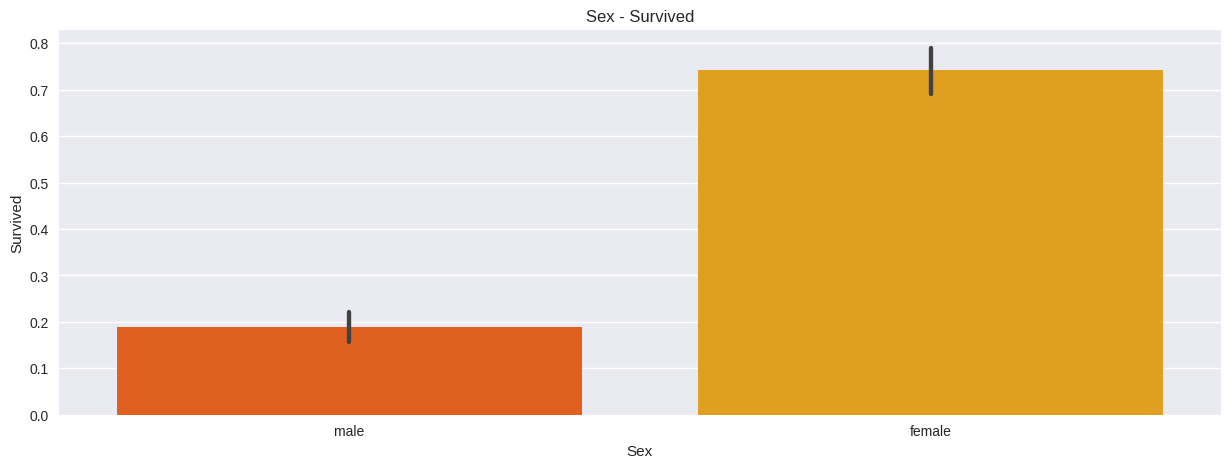

In [ ]:
sns.barplot(x="Sex", y="Survived", data=df, palette="autumn") #seaborn
plt.title("Sex - Survived")
plt.show()

**Задание 4. Посмотреть, как влияет пол человека и класс билета (Pclass) на выживаемость**

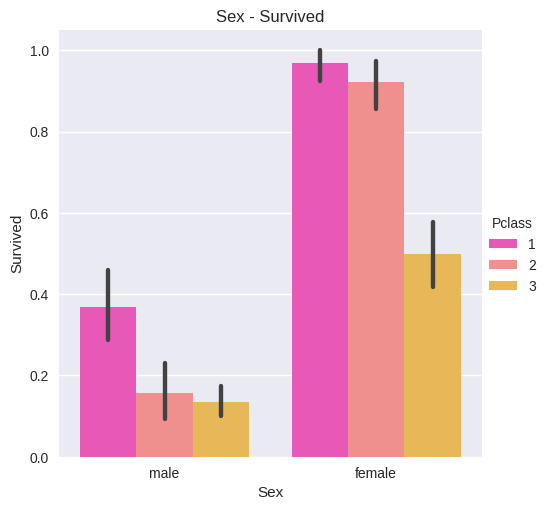

In [ ]:
# <YOUR CODE HERE>
sns.catplot(x="Sex", y="Survived", hue="Pclass", data=df, kind="bar", palette="spring") #seaborn
plt.title("Sex - Survived")
plt.show()

Ещё один полезный вид визуализации — **ящик с усами**. Такой вид графиков позволяет визуально оценить моду и разброс распределения признака. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту.

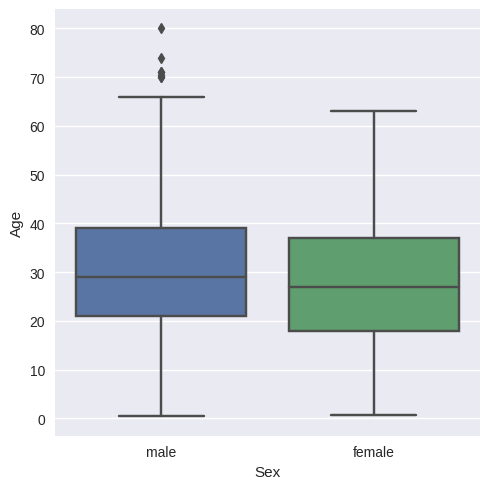

In [ ]:
sns.catplot(x="Sex", y="Age", data=df, kind="box")  # box plot (box-and-whiskers-plot)
plt.show()

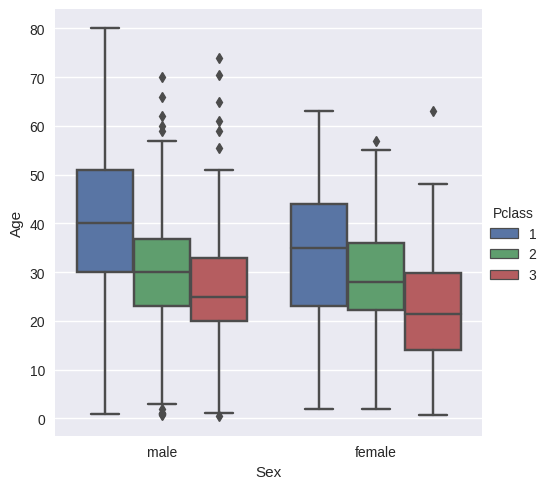

In [ ]:
sns.catplot(x="Sex", y="Age", hue="Pclass", data=df, kind="box")
plt.show()

#### <u>Обработаем признак `Embarked` (порт посадки)</u>

In [ ]:
#Проверяем на пропущенные значения (другой вариант)
print(f"Data size: {df.shape}")
df["Embarked"].value_counts(dropna=False)
#dropna=False - считает число пропусков !!!

Data size: (891, 14)


S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

**Задание 5. Удалите из таблицы пассажиров, для которых неизвестен порт посадки.**

In [ ]:
# <YOUR CODE HERE>
df = df.dropna(subset=["Embarked"])
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
df.shape


(889, 14)

**Задание 6. Преобразуем столбец `Embarked` <u>методом OneHot-кодирования</u> при помощи `pd.get_dummies)` (более двух значений!).**

In [ ]:
# <YOUR CODE HERE>
pd.get_dummies(df, columns=['Embarked'], drop_first=False) # 1 показывает из какого именно порта человек отправился

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,prefix,Sex_01,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Mr,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Mrs,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Mrs,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Mr,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Rev,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,Miss,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,Miss,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,Mr,1,1,0,0


#### <u>Обработаем признак `Age`</u>

**Задание 7. Проверьте, если ли в `Age` пропущенные значения.**

In [ ]:
# <YOUR CODE HERE>
sum(df.Age.isna())

177

In [ ]:
df["Age"].median()

28.0

**Задание 8. Заполнить пропуски медианным значением `Age`**

In [ ]:
median_age = df["Age"].median()
df["Age"].fillna(median_age, inplace=True)


In [ ]:
sum(df.Age.isna())

0

Нарисуем распределение возраста пассажиров.

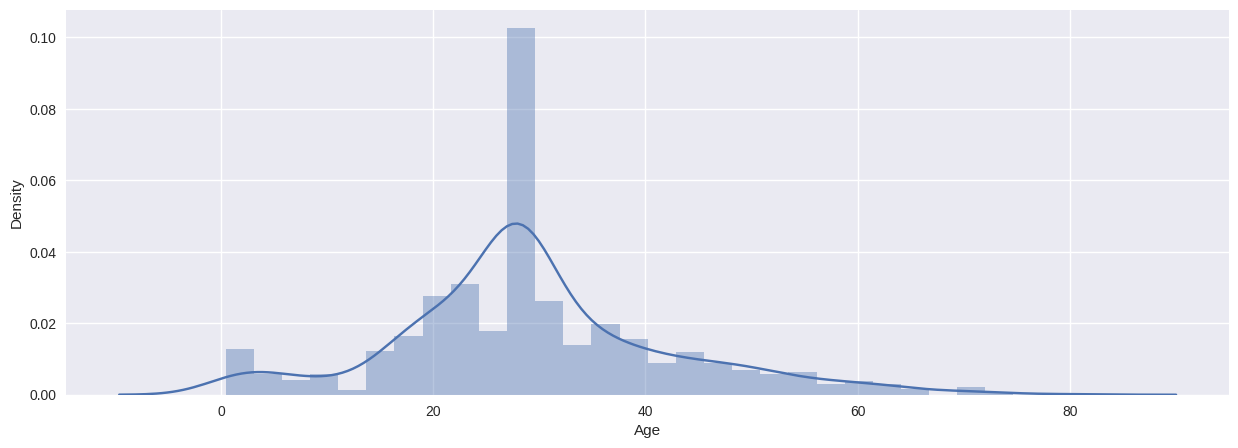

In [ ]:
#сглаженный вариант гистограммы (kde=True)
sns.distplot(df["Age"], kde=True)
plt.show()
#пик, т.к. так заполнили пропуски

---

##### Дополнительно

Посмотрим на распределение `Pclass` по возрастам.

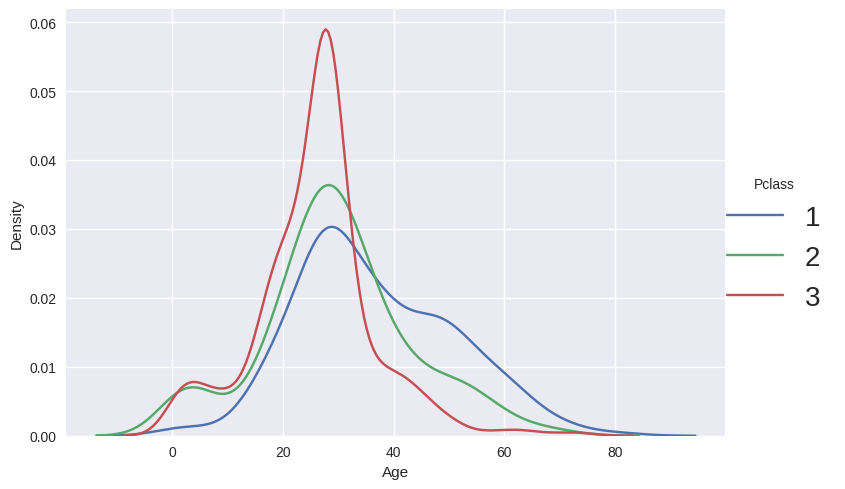

In [ ]:
facet = sns.FacetGrid(data=df, hue="Pclass", legend_out=True, height=5, aspect=1.5)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend(fontsize=20);

---

#### <u>Обработаем признак `Fare` (тариф)</u>

**Задание 9. Проверьте, если ли в `Fare` пропущенные значения. Если пропущенные значения есть, заполните их медианными значениями `Fare`**

In [ ]:
sum(df.Fare.isna())

0

In [ ]:
# <YOUR CODE HERE>
median_fare = df["Fare"].median()
df["Fare"].fillna(median_fare, inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prefix,Sex_01
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1


In [ ]:
df.Fare.isna().sum()

0

#### <u>Обработаем признак `Pclass` (класс)</u>

**Задание 10. Проверьте, если ли в `Pclass` пропущенные значения.**

In [ ]:
# <YOUR CODE HERE>
df["Pclass"].isna().sum()

0

**Задание 11. Нарисуйте гистограмму выживаемости в зависимости от `Pclass`.**

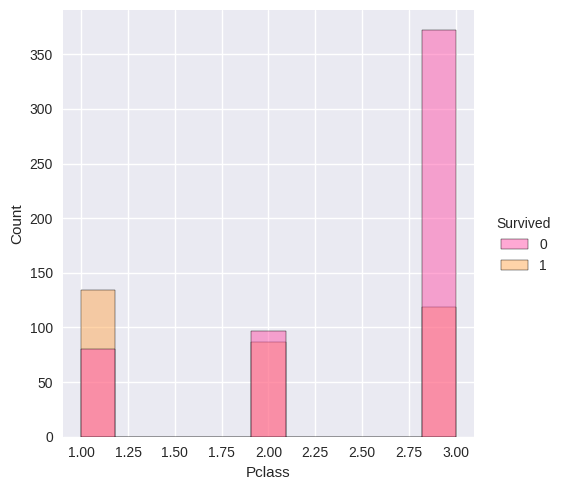

In [ ]:
sns.displot(df, x="Pclass", hue="Survived", palette="spring")
plt.show()

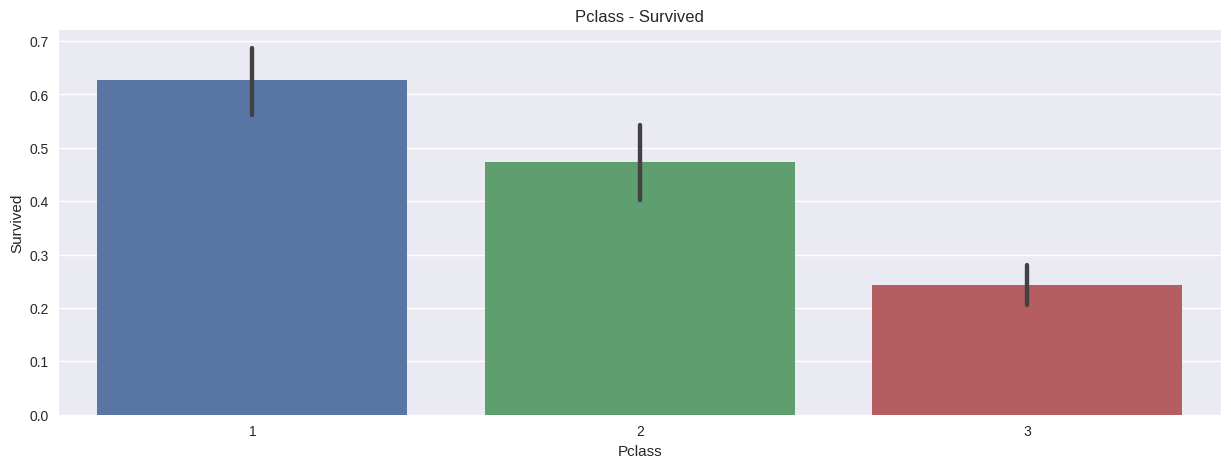

In [ ]:
# <YOUR CODE HERE>
sns.barplot(x="Pclass", y="Survived", data=df) #seaborn
plt.title("Pclass - Survived")
plt.show()

#### <u>Обработаем признак `SibSp` (число братьев или сестер, мужей, жен)</u>

**Задание 12. Проверим, если ли в `SibSp` пропущенные значения.**

In [ ]:
# <YOUR CODE HERE>
df['SibSp'].isna().sum()

0

#### <u>Обработаем признак `Parch` (число братьев или сестер, мужей, жен)</u>

**Задание 13. Проверим, если ли в `Parch` пропущенные значения.**

In [ ]:
df['Parch'].isna().sum()

0

**Задание 14. Столбец PassengerId является категориальным и не несёт важной информации, удалите его.**

In [ ]:
# <YOUR CODE HERE>
df = df.drop('PassengerId', axis=1)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Feature engineering

**Задание 15. Создайте таблицу `NumericData`, которая содержит только числовые столбцы из таблицы `df`.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [ ]:
# <YOUR CODE HERE>
NotNumericData = df.select_dtypes(include=['object'])
NumericData = df.drop(NotNumericData, axis=1)
NumericData

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


Посмотрим на **попарные зависимости между некоторыми признаками**.

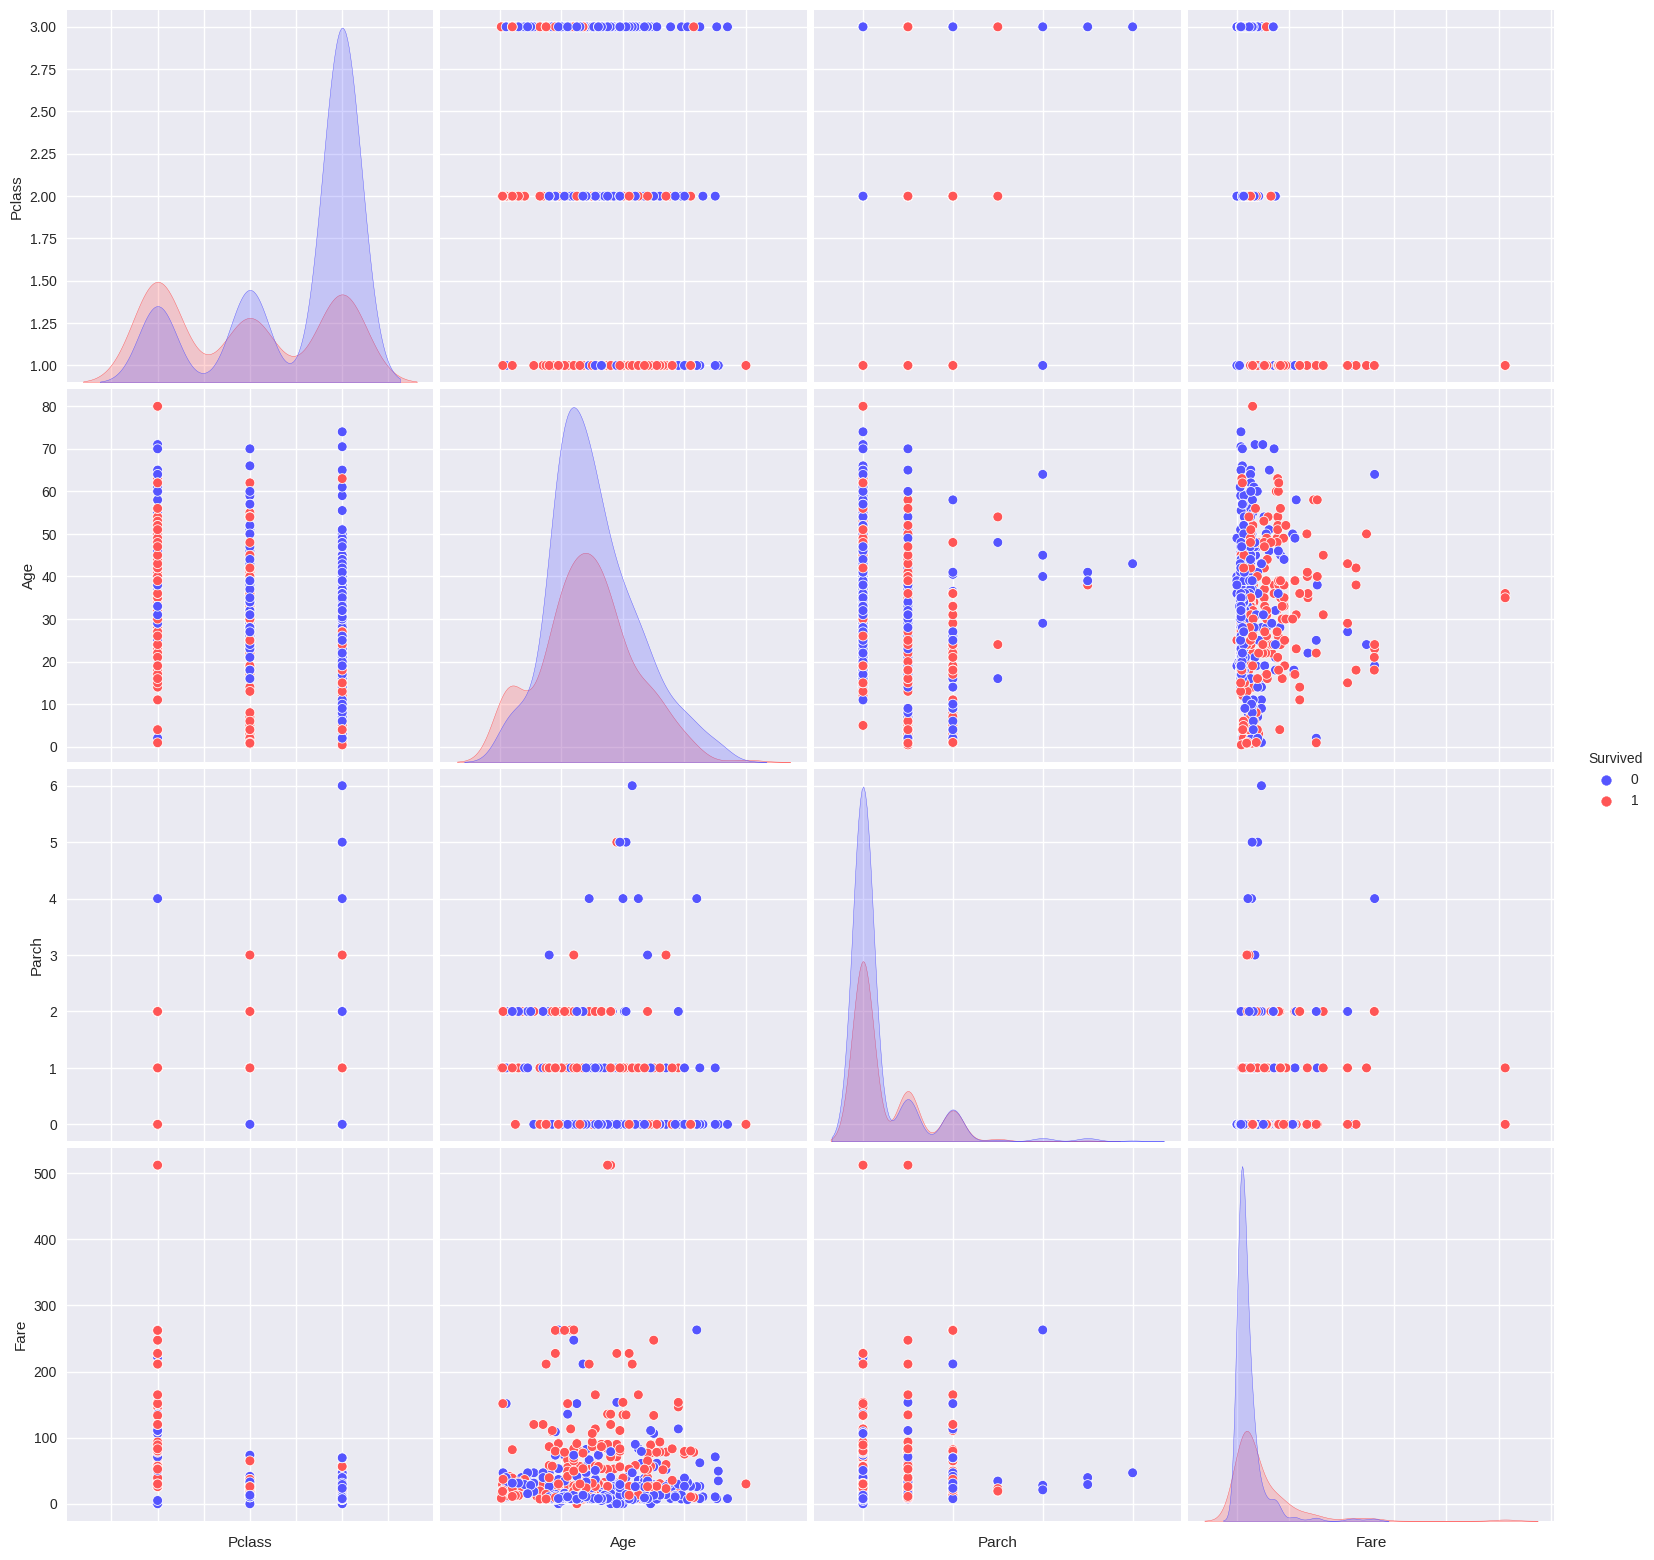

In [ ]:
g = sns.pairplot(
    df[["Survived", "Pclass", "Sex", "Age", "Parch", "Fare"]],
    hue="Survived",
    palette="seismic",
    size=4,
    diag_kind="kde",
    diag_kws=dict(shade=True),
    plot_kws=dict(s=50),
)
g.set(xticklabels=[]);

---

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

**<u>Бинаризуем признаки `Age` и `Fare`.**</u>

* `pd.cut` — разбиение целочисленных данных на несколько интервалов по квантилям
* `pd.qcut` — разбиение числовых (необязательно целочисленных) данных на несколько интервалов по квантилям

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Разобьем возраст на 5 групп
df["AgeBin"] = pd.cut(df["Age"].astype(int), 5)
df["AgeBin"].head()

0    (16.0, 32.0]
1    (32.0, 48.0]
2    (16.0, 32.0]
3    (32.0, 48.0]
4    (32.0, 48.0]
Name: AgeBin, dtype: category
Categories (5, interval[float64, right]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] <
                                           (48.0, 64.0] < (64.0, 80.0]]

Теперь переведём полученные интервалы в числа, используя `LabelEncoder`.

In [ ]:
from sklearn.preprocessing import LabelEncoder

#каждой группе поствим в соответствие свое число
label = LabelEncoder()
df["AgeBin_Code"] = label.fit_transform(df["AgeBin"])
df[["Age", "AgeBin", "AgeBin_Code"]].head()

,Age,AgeBin,AgeBin_Code
0,22.0,"(16.0, 32.0]",1
1,38.0,"(32.0, 48.0]",2
2,26.0,"(16.0, 32.0]",1
3,35.0,"(32.0, 48.0]",2
4,35.0,"(32.0, 48.0]",2


In [ ]:
#коэффициенты корреляции
np.corrcoef(df['Age'],df['Survived'])[0][1]

-0.06982170767891921

In [ ]:
#коэффициенты корреляции
np.corrcoef(df['AgeBin_Code'],df['Survived'])[0][1]

-0.048979529513472696

**Задание 16. Бинаризуйте `Fare`, используя разбиение на 4 интервала.**

In [ ]:
# <YOUR CODE HERE>
df["FareBin"] = pd.cut(df["Fare"].astype(int), 4)
df["FareBin"].head()

0    (-0.512, 128.0]
1    (-0.512, 128.0]
2    (-0.512, 128.0]
3    (-0.512, 128.0]
4    (-0.512, 128.0]
Name: FareBin, dtype: category
Categories (4, interval[float64, right]): [(-0.512, 128.0] < (128.0, 256.0] < (256.0, 384.0] <
                                           (384.0, 512.0]]

In [ ]:
label = LabelEncoder()
df["FareBin_Code"] = label.fit_transform(df["FareBin"])
df[["Fare", "FareBin", "FareBin_Code"]].head()

,Fare,FareBin,FareBin_Code
0,7.2500,"(-0.512, 128.0]",0
1,71.2833,"(-0.512, 128.0]",0
2,7.9250,"(-0.512, 128.0]",0
3,53.1000,"(-0.512, 128.0]",0
4,8.0500,"(-0.512, 128.0]",0


---

## Дополнительно

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки `Parch` и `SibSp` слабо коррелируют с выживаемостью (`Survived`). Сконструируем новые признаки, чтобы решить эти проблемы.

**Задание 17.**

1) Создайте признак `NameLen` и запишите в него длину имени (Name).

2) Создайте признак `FamilySize`, равный `Parch` + `SibSp` + 1(сам человек)

3) Создайте признак `IsAlone`, который показывает, путешествовал человек один или с семьей.

In [ ]:
name_list = df.Name.tolist()
symbol_to_remove = [",", ".", "(", ")"]
for i in range(len(name_list)):
    for symbol in symbol_to_remove:
        name_list[i] = name_list[i].replace(symbol, "")
name_list
amount = [len(name.replace(" ", "")) for name in name_list]
df["NameLen"] = amount
df #1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin,NameLen
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.0, 32.0]",18
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(32.0, 48.0]",41
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.0, 32.0]",18
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(32.0, 48.0]",34
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(32.0, 48.0]",19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(16.0, 32.0]",17
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(16.0, 32.0]",23
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,"(16.0, 32.0]",34
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(16.0, 32.0]",16


In [ ]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin,NameLen,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.0, 32.0]",18,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(32.0, 48.0]",41,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.0, 32.0]",18,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(32.0, 48.0]",34,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(32.0, 48.0]",19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(16.0, 32.0]",17,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(16.0, 32.0]",23,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,"(16.0, 32.0]",34,4
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(16.0, 32.0]",16,1


In [ ]:
df["IsAlone"] = np.where(df["FamilySize"] == 1, 1, 0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin,NameLen,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.0, 32.0]",18,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(32.0, 48.0]",41,2,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.0, 32.0]",18,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(32.0, 48.0]",34,2,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(32.0, 48.0]",19,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(16.0, 32.0]",17,1,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(16.0, 32.0]",23,1,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,"(16.0, 32.0]",34,4,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(16.0, 32.0]",16,1,1


**Задание 18.** Посмотрите, как коррелируют новые признаки (не забудьте про бинаризованные признаки) со столбцом `Survived`.

In [ ]:
# <YOUR CODE HERE>
np.corrcoef(df['FareBin_Code'],df['Survived'])[0][1]

0.1474659914679178

In [ ]:
# <YOUR CODE HERE>
np.corrcoef(df['Fare'],df['Survived'])[0][1]

0.2573065223849625

In [ ]:
# <YOUR CODE HERE>
np.corrcoef(df['Pclass'],df['Survived'])[0][1]

-0.33848103596101475

In [ ]:
np.corrcoef(df['NameLen'],df['Survived'])[0][1]

0.3242693100086404

In [ ]:
np.corrcoef(df['FamilySize'],df['Survived'])[0][1]

0.016638989282745285

In [ ]:
np.corrcoef(df['IsAlone'],df['Survived'])[0][1]

-0.20336708569989206

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков.

**Задание 19.** Придумайте новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

In [ ]:
# <YOUR CODE HERE>  Мы уже рассмотрели все стоящие признаки, больше нет идей :(